<a href="https://colab.research.google.com/github/daa103/DAA_ESAA/blob/main/%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%85%90%EC%84%9C%ED%94%8C%EB%A1%9C_ch3_1~3_pg_50_~_86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**01 딥러닝 준비**

**1-1-1 하이퍼파라미터**
- 훈련시 사용자가 직접 설정해주는 설정값을 뜻함
- 모델 훈련시 가중치와 편향은 자동업데이트, but 하습 속도나 반복 훈련횟수는 직접 설정해야되는데, 이것을 하이퍼파라미터라고함
- 하이퍼파라미터에 따라 모델의 성능 및 결과가 달라져 중요함.

**1-1-2 과소적합vs과대적합**
- 훈련용 데이터는 모델이 학습할 데이터, 예측 데이터는 정답 레이블이 없는 머신러닝 모델이 예측하는 대상

- 모델이 충분히 학습되지 않은 경우 예측 성능이 떨어지는데, 이것은 과소적합
- 학습데이터를 지나치게 반복학습하여 과하게 적합된 상태는 과대적합, 훈련데이터에 대한 예측 성능은 좋지만 예측 데이터에 대한 예측 오차가 발생할 확률이 높다.

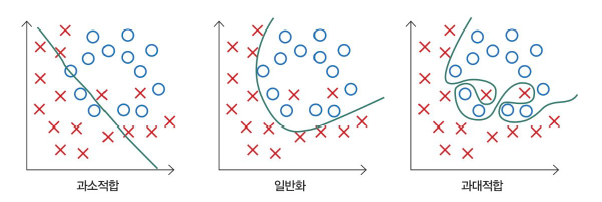

-> 과소적합과 과대적합 문제를 최소화하며 정확도를 높이는 것이 중요

**1-1-3 에포크**

딥러닝은 데이터셋을 학습하는 과정을 반복하면서 최적의 모델 가중치를 찾는 과정이다. 반복훈련할 때 데이터셋을 전부 학습에 사용하는 1회의훈련 루프를 에포크라고 한다.

**1-1-4 손실함수**

- 예측값과 정답값의 차이 또는 오차 (딥러닝 모델의 출력값과 실제값의 차이)

- 분류나 회귀모델에 따라 손실함수를 다르게 적용한다.

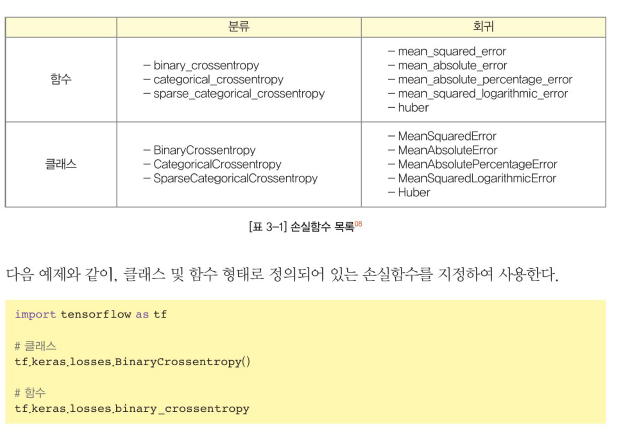

In [1]:
import tensorflow as tf

# 클래스
tf.keras.losses.BinaryCrossentropy()

# 함수
tf.keras.losses.binary_crossentropy

<function keras.src.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

**1-1-5 경사하강법**

딥러닝 모델을 훈련할 때, 모델 내부의 가중치에 대한 미분값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 최소함수값을 갖도록 하는 방법이다.

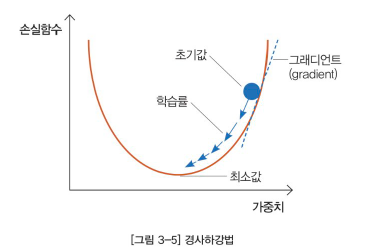

- 경사하강법을 적용해 손실함수 값을 최소로 만드는 가중치를 찾을 수 있다.

- y= wx+b
선형회귀 수식이 주어졌을 때 손실함수를 최소로하는 w와 b를 구하는 과정을 경사하강법으로 구현한다.

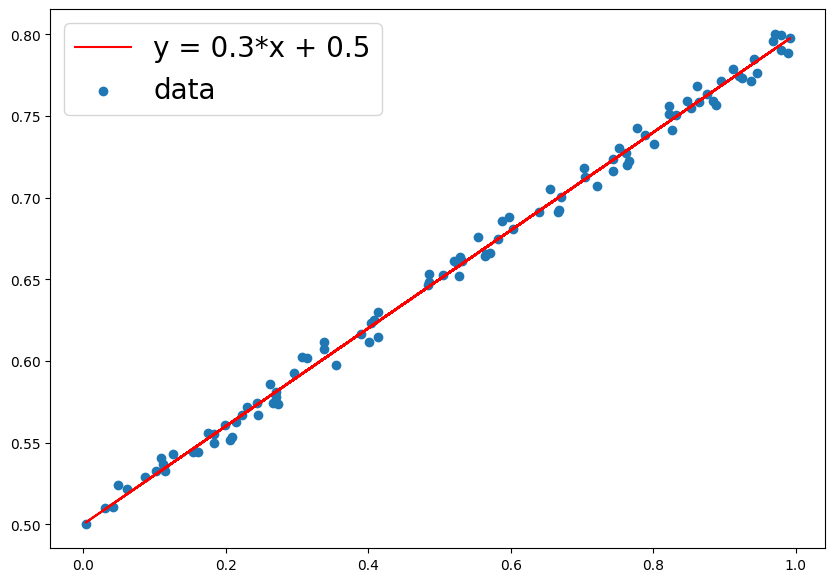

w:0.3,b:0.5


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5,b=0.8, size=50, noise=1.0):
  x = np.random.rand(size)
  y = w * x + b
  noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
  yy = y + noise
  plt.figure(figsize=(10,7))
  plt.plot(x,y,color='r',label=f'y = {w}*x + {b}')
  plt.scatter(x,yy,label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w:{w},b:{b}')
  return x,yy

x,y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

약간의 노이즈가 추가된 것을 확인.

- 경사하강법 알고리즘 핵심인 w,b에 대한 그래디언트를 구하는 부분만 구현하면 된다. 그래디언트는 손실함수를 w,b에 대한 각각의 편미분 값을 구한 뒤 학습률 계수를 곱하여 이전의 w,b로부터 차감한다.

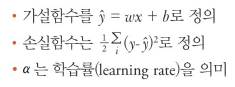

그래디언트 w,b를 업데이트 수식을 구했다면 넘파이로 최적화하는 과정 구현한다.

매 epoch마다 w,b에 대한 가중치를 업데이트한다.

In [3]:
# 최대 반복 횟수 지정
num_epoch = 1000

# 학습률(learning_rate)
learning_rate = 0.005

# 에러 기록
errors = []

# random 한 값으로 w,b를 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
  # Hypothesis 정의
  y_hat = w * x + b

  # Loss Function 정의
  error = 0.5*((y_hat-y)**2).sum()
  if error < 0.005:
    break
  # Gradient 미분 계산
  w = w - learning_rate * ((y_hat-y)*x).sum()
  b = b - learning_rate * (y_hat-y).sum()

  errors.append(error)

  if epoch % 5 == 0:
    print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch,w,b,error))

print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch,w,b,error))

 0 w = 0.93954, b = 0.14534 error = 1.94839
 5 w = 0.83676, b = 0.19767 error = 1.37528
10 w = 0.75215, b = 0.24533 error = 0.97721
15 w = 0.68086, b = 0.28551 error = 0.69450
20 w = 0.62077, b = 0.31938 error = 0.49371
25 w = 0.57014, b = 0.34792 error = 0.35111
30 w = 0.52747, b = 0.37197 error = 0.24984
35 w = 0.49151, b = 0.39224 error = 0.17791
40 w = 0.46121, b = 0.40932 error = 0.12683
45 w = 0.43567, b = 0.42371 error = 0.09055
50 w = 0.41414, b = 0.43585 error = 0.06478
55 w = 0.39600, b = 0.44607 error = 0.04649
60 w = 0.38072, b = 0.45468 error = 0.03349
65 w = 0.36784, b = 0.46195 error = 0.02426
70 w = 0.35698, b = 0.46806 error = 0.01770
75 w = 0.34783, b = 0.47322 error = 0.01305
80 w = 0.34012, b = 0.47757 error = 0.00974
85 w = 0.33363, b = 0.48123 error = 0.00739
90 w = 0.32815, b = 0.48432 error = 0.00573
------------------------------------------------------------
93 w = 0.3, b = 0.5 error = 0.00497


가중치가 난수값에 의해 초기화되어 실행마다 수렴속도 차이가 있다. 반복문 종료 후 w,b의 계수를 확인하면 샘플 데이터 셋을 생성할 때 설정한 w,b계수와 비슷한 값임을 확인할 수 있다.

### 딥러닝 프로세스
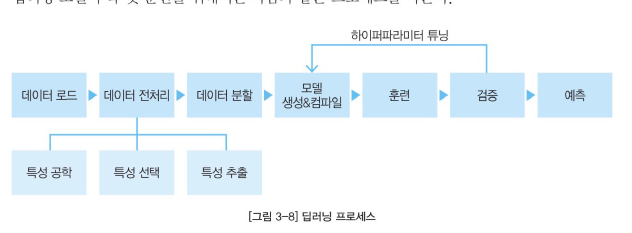

**1-2-1 데이터 전처리**


- 전처리 단계에서 데이터셋의 형태나 차원을 구성해야 다음단계에서 모델 설계시 입력할 데이터셋의 형태를 올바르게 정의할 수 있다.

**1-2-2 모델생성**

모델의 구조를 정의하고 생성하는 단계

**1-2-3 모델 컴파일**

모델 훈련에 사용할 손실함수, 옵티마이저, 평가지표를 정의하는 단계

**1-2-4 모델훈련**

fit()함수에 모델 훈련에 필요한 정보를 매개변수로 전달한다.

**1-2-5 모델검증**

훈련완료된 모델 검증.

**1-2-6 모델예측**

###2-1 선형회귀

텐서플로 케라스를 활용해 단순선형회귀 모델을 직접 만들고 딥러닝을 학습한다.

y= wx+b (w는 가중치, b는 편향의 b)

###2-2 뉴런

인공신경망 모델을 구성하는 하나의 신경을 의미. 노드라고 불리기도 하고 같은 의미를 가지며 혼용한다.

##2-3 Dense 레이어##

심층 신경망 모델을 구성하는 가장 기본 레이어이다. 각 레이어와 레이어 사이 뉴런이 연결되어 완전 연결층으로 부르기도 한다.

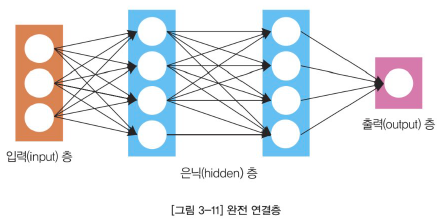

In [4]:
import tensorflow as tf

# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# ReLu 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

###2-4 데이터셋 만들기

In [5]:
# 샘플 데이터셋 생성
x = np.arange(1,6)

# y = 3x + 2
y = 3*x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


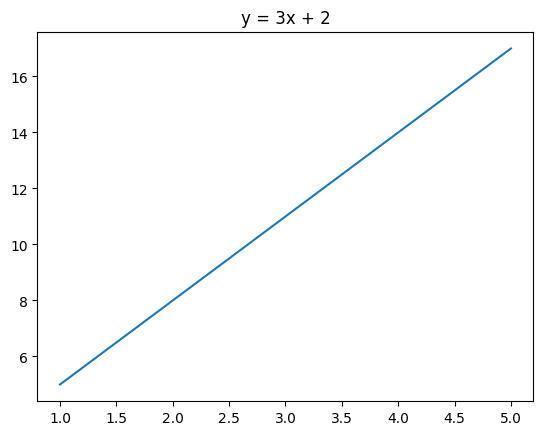

In [6]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x,y)
plt.title('y = 3x + 2')
plt.show()

###2-5 Sequential API

**2-5-1 모델구조**

In [7]:
import tensorflow as tf

# 리스트형
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(5),
        tf.keras.layers.Dense(1)
        ])

In [9]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

**2-5-2 입력데이터 형태**

In [8]:
import tensorflow as tf

model = tf.keras.Sequential([
  # 입력 데이터의 shape=(150,4)인 경우 input_shape 지정
  tf.keras.layers.Dense(10, input_shape=[4]),
  tf.keras.layers.Dense(5),
  tf.keras.layers.Dense(1)
])

**2-5-3 단순 선형회귀 모델의 정의**

In [10]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
])

### 2-6 모델요약

In [11]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Trainable params는 모델 훈련시 업데이트 할 파라미터 총개수, Non-trainable params는 훈련시 업데이트하지 않을 파라미터의 총 개수를 나타낸다.

###2-7 컴파일

훈련과정에서 적용할 옵티마이저, 손실함수, 평가지표를 정의한다.

In [12]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [13]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse', 'mae'])

In [14]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()
              ])

In [15]:
# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

###2-8 훈련

생성한 모델 인스턴스에 fit()메소드를 적용하면 데이터를 입력하여 모델을 훈련시킬 수 있다. 가중치 텐서를 업데이트=훈련시킨다

In [16]:
model.fit(x,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 461ms/step - loss: 86.1758 - mae: 8.7250
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 50.3416 - mae: 6.7110
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 29.4583 - mae: 5.1734
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 17.2878 - mae: 3.9994
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 10.1946 - mae: 3.1031


5epoch 훈련, 손실함수값은 mse로 지정했기 때문에 해당 값은 평균제곱 오차를 나타낸다.

epoch당 loss값이 예측오차가 점점 줄어든다. 모델 학습이 잘되지만 반복횟수가 충분하지 않아 과소적합상태라고 볼 수 있다.

In [17]:
# 단순 선형회귀 모델 생성
model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

# 훈련
history = model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 362ms/step - loss: 188.2467 - mae: 12.7501
Epoch 2/1200
1/1 [==============================] - 0s 10ms/step - loss: 109.7663 - mae: 9.7701
Epoch 3/1200
1/1 [==============================] - 0s 9ms/step - loss: 64.0313 - mae: 7.4951
Epoch 4/1200
1/1 [==============================] - 0s 11ms/step - loss: 37.3788 - mae: 5.7582
Epoch 5/1200
1/1 [==============================] - 0s 12ms/step - loss: 21.8466 - mae: 4.4322
Epoch 6/1200
1/1 [==============================] - 0s 11ms/step - loss: 12.7948 - mae: 3.4199
Epoch 7/1200
1/1 [==============================] - 0s 11ms/step - loss: 7.5194 - mae: 2.6470
Epoch 8/1200
1/1 [==============================] - 0s 11ms/step - loss: 4.4447 - mae: 2.0568
Epoch 9/1200
1/1 [==============================] - 0s 11ms/step - loss: 2.6526 - mae: 1.6061
Epoch 10/1200
1/1 [==============================] - 0s 11ms/step - loss: 1.6077 - mae: 1.2620
Epoch 11/1200
1/1 [==============================]

충분한 epoch훈련후 mse,mae모두 개선되었다. 훈련결과는 history변수를 사용하여 epoch별 훈련손실 및 평가지표를 시각화할 수 있다.

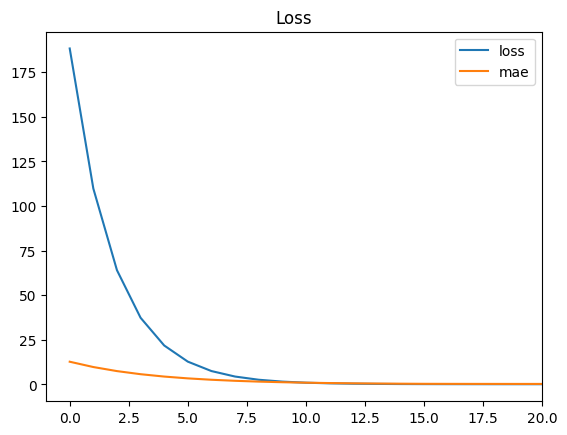

In [18]:
import matplotlib.pyplot as plt

# 20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['mae'],label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()

###2-9 검증

In [19]:
model.evaluate(x,y)

1/1 [==============================] - 0s 435ms/step - loss: 4.7033e-05 - mae: 0.0059


[4.703337253886275e-05, 0.00588645925745368]

###2-10 예측

In [20]:
model.predict([10])

1/1 [==============================] - 0s 179ms/step


array([[32.02845]], dtype=float32)

###**03 심층 신경망으로 이미지분류**

###3-1 케라스 내장데이터셋 로드

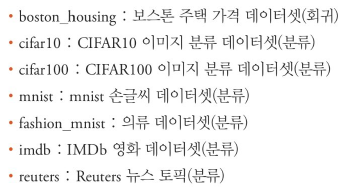

In [21]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

In [22]:
# load_data()로 데이터셋 로드
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [23]:
# 로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


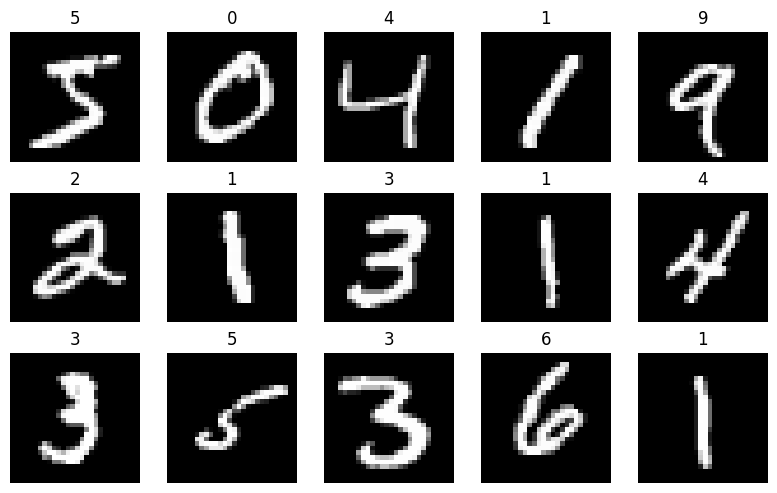

In [24]:
## 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
  ax = axes[i//5, i%5]
  # imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

### 데이터전처리

In [25]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

In [26]:
# 픽셀 값의 최소/최대값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [27]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [28]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

### Flatten레이어

이미지데이터를 1차원으로 전처리하여 주입해야한다. 2차원 입력은 Dense레이어에 입력값으로 넣을수 없기 때문.

In [29]:
print(f'변경 전 shape:{x_train.shape}')
print(f'ID으로 shape 변경 후: {x_train.reshape(60000,-1).shape}')

변경 전 shape:(60000, 28, 28)
ID으로 shape 변경 후: (60000, 784)


In [30]:
# 다차원 데이터를 1차원으로 펼쳐주는 방법
print(f'변경 전 shape:{x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후:{tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape:(60000, 28, 28)
Flatten 적용 후:(60000, 784)


###3-4 활성화함수

- 입력을 비선형으로 출력으로 변환해주는 함수.

In [31]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

In [32]:
# Dense 레이어와 relu 활성화 함수 레이어를 별도 적용한 경우
model = tf.keras.Sequential([
        tf.keras.layers.Dense(128),
        tf.keras.layers.Activation('relu')
])

###3-5 입력과 출력

딥러닝 모델 만들때 첫번째 레이어에 입력데이터의 형태를 나타내는 input_shpae매개변수를 지정하는 것이 일반적.

In [33]:
model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        # 노드 = 10개(클래스 개수와 동일) = 마지막 출력층의 노드 개수
        tf.keras.layers.Dense(10, activation='softmax'),
])

출력층노드가 2개이상인 경우 softmax활성화 함수 적용.

In [34]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax  -> 다중 분류 문제
tf.keras.layers.Dense(10, activation='softmax')

###3-6 손실함수

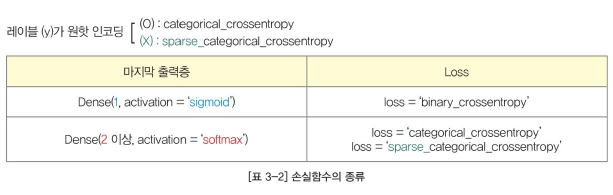

In [35]:
# 이진 분류(출력 노드 개수 = 1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

In [36]:
# y가 원핫 벡터인 경우
# [0.,0.,0.,0.,0.,1.,0.,0.,0.,0.]
model.compile(loss='categorical_crossentropy')
# y가 원핫 벡터가 아닌 경우
# [5]
model.compile(loss='sparse_categorical_crossentropy')

###3-7 옵티마이저

손실을 낮추기 위해서, 신경망의 가중치와 학습률과 같은 신경망 속성을 변경하는데 사용되는 최적화 방법이다.

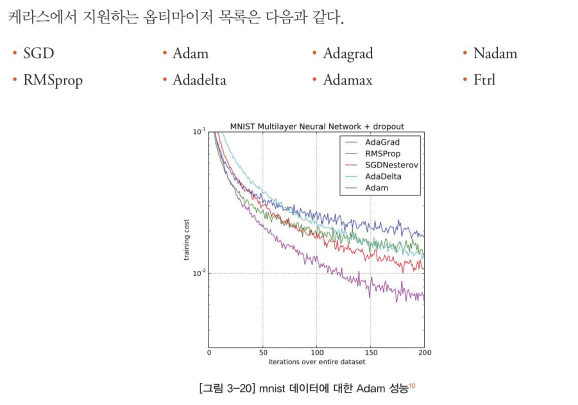

In [37]:
# 클래스 인스턴스로 지정 : 문자열과는 다르게 하이퍼파라미터 직접 설정 가능
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

# 문자열로 지정 : 클래스 이름을 소문자로
model.compile(optimizer='adam')

###3-8 평가지표

In [38]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=[acc])

In [39]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

###3-9 훈련

In [40]:
model.fit(x_train, y_train,
          # 검증 셋 지정
          validation_data=(x_test, y_test),
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2413 - accuracy: 0.9271 - val_loss: 0.1300 - val_accuracy: 0.9597
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0976 - accuracy: 0.9700 - val_loss: 0.1117 - val_accuracy: 0.9660
Epoch 3/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0674 - accuracy: 0.9783 - val_loss: 0.0865 - val_accuracy: 0.9728
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0510 - accuracy: 0.9839 - val_loss: 0.0864 - val_accuracy: 0.9761
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0394 - accuracy: 0.9871 - val_loss: 0.0868 - val_accuracy: 0.9749
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0332 - accuracy: 0.9890 - val_loss: 0.0872 - val_accuracy: 0.9767
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0281 - accuracy: 0.9905 - val_loss: 0.0874 - val_acc

###3-10 평가

In [41]:
test_loss, test_acc = model.evaluate(x_test, y_test) # evaluate() : 손실과 정확도를 순서대로 반환.

print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0968 - accuracy: 0.9791
검증 셋 정확도: 0.9790999889373779


###3-11 예측

In [42]:
# 예측
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [43]:
# 예측 결과 출력
predictions[0]

array([2.7251034e-14, 3.0871149e-11, 2.6201219e-10, 1.7614086e-08,
       1.6324019e-08, 3.4707630e-12, 5.9005444e-12, 9.9999958e-01,
       8.7593055e-10, 4.0347487e-07], dtype=float32)

In [44]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


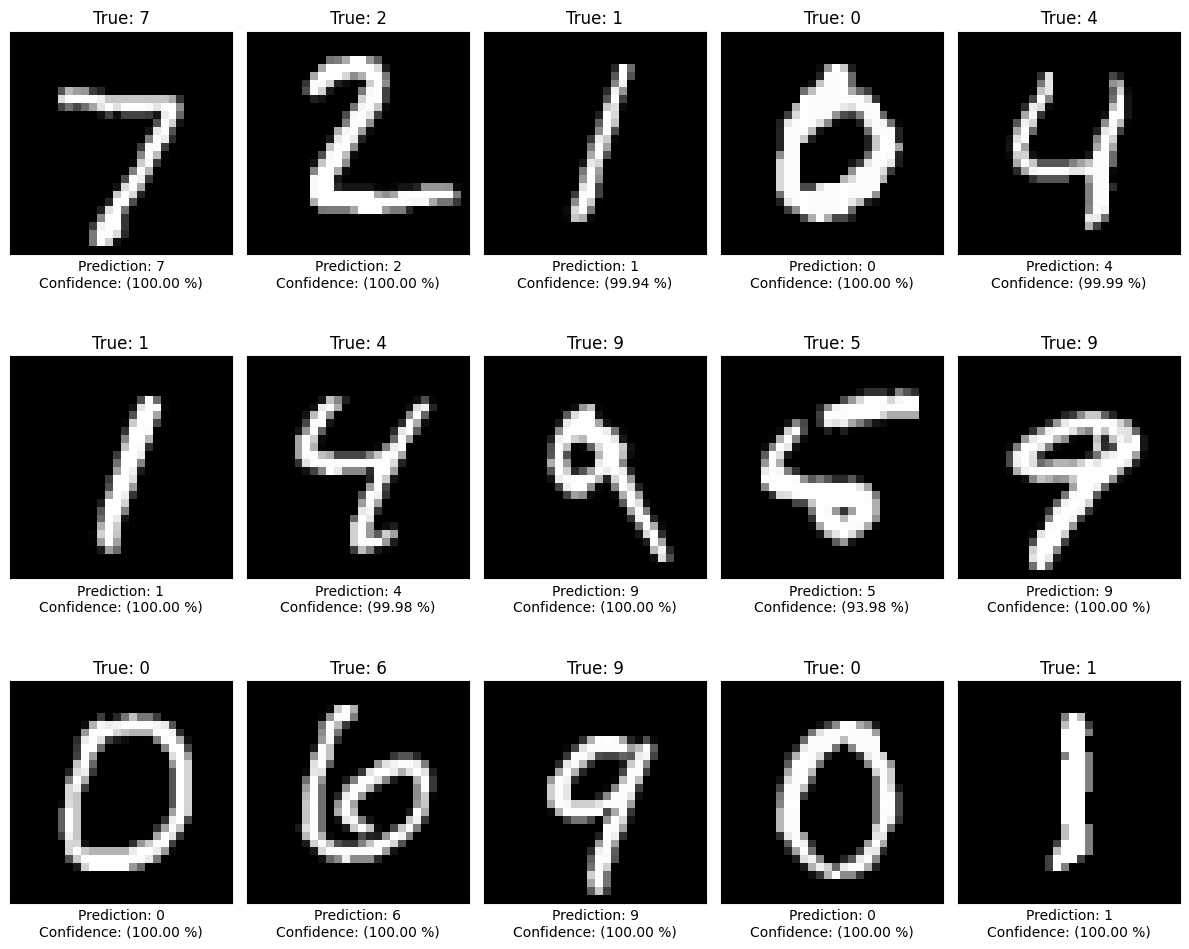

In [45]:
## 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(12,10)
for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i)
  # imshow로 이미지 시각화
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')
plt.tight_layout()
plt.show()